In [6]:
import tensorflow as tf
from keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [7]:
# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


In [8]:
# Normalize and reshape
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_images = train_images[..., tf.newaxis]  # shape: (28, 28, 1)
test_images = test_images[..., tf.newaxis]


In [9]:

# Data augmentation with validation split
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    shear_range=0.1,
    validation_split=0.1  # 10% for validation
)
train_datagen.fit(train_images)
val_datagen = ImageDataGenerator(validation_split=0.1)


In [10]:

# CNN Model architecture (deep + dropout + BN + GAP)
model = models.Sequential([
    layers.Input((28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (5, 5), strides=2, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (5, 5), strides=2, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(128, (4, 4), strides=2, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

In [11]:
# Compile the model
optimizer = optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = callbacks.EarlyStopping(monitor="val_accuracy", patience=6, restore_best_weights=True)
lr_schedule = callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6, verbose=1
)
model_ckpt = callbacks.ModelCheckpoint(
    "best_combined_model.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1
)


In [12]:
# Set training parameters
batch_size = 64
epochs = 100
steps_per_epoch = int(len(train_images) * 0.9) // batch_size
validation_steps = int(len(train_images) * 0.1) // batch_size

# Train the model using augmented data
history = model.fit(
    train_datagen.flow(train_images, train_labels, batch_size=batch_size, subset='training'),
    validation_data=val_datagen.flow(train_images, train_labels, batch_size=batch_size, subset='validation'),
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=epochs,
    callbacks=[early_stop, lr_schedule, model_ckpt],
    verbose=2
)


Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.98454, saving model to best_combined_model.h5


843/843 - 33s - 39ms/step - accuracy: 0.9183 - loss: 0.2632 - val_accuracy: 0.9845 - val_loss: 0.0506 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_accuracy improved from 0.98454 to 0.98471, saving model to best_combined_model.h5


843/843 - 0s - 581us/step - accuracy: 0.9844 - loss: 0.0424 - val_accuracy: 0.9847 - val_loss: 0.0490 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_accuracy improved from 0.98471 to 0.98757, saving model to best_combined_model.h5


843/843 - 19s - 22ms/step - accuracy: 0.9768 - loss: 0.0763 - val_accuracy: 0.9876 - val_loss: 0.0416 - learning_rate: 1.0000e-03
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.98757
843/843 - 1s - 678us/step - accuracy: 0.9219 - loss: 0.1936 - val_accuracy: 0.9850 - val_loss: 0.0447 - learning_rate: 1.0000e-03
Epoch 5/100

Epoch 5: val_accuracy improved from 0.98757 to 0.98841, saving model to best_combined_model.h5


843/843 - 20s - 24ms/step - accuracy: 0.9821 - loss: 0.0573 - val_accuracy: 0.9884 - val_loss: 0.0354 - learning_rate: 1.0000e-03
Epoch 6/100

Epoch 6: val_accuracy did not improve from 0.98841
843/843 - 0s - 585us/step - accuracy: 0.9844 - loss: 0.0478 - val_accuracy: 0.9882 - val_loss: 0.0372 - learning_rate: 1.0000e-03
Epoch 7/100

Epoch 7: val_accuracy did not improve from 0.98841
843/843 - 20s - 24ms/step - accuracy: 0.9847 - loss: 0.0504 - val_accuracy: 0.9866 - val_loss: 0.0427 - learning_rate: 1.0000e-03
Epoch 8/100

Epoch 8: val_accuracy improved from 0.98841 to 0.98908, saving model to best_combined_model.h5


843/843 - 0s - 571us/step - accuracy: 0.9844 - loss: 0.1200 - val_accuracy: 0.9891 - val_loss: 0.0355 - learning_rate: 1.0000e-03
Epoch 9/100

Epoch 9: val_accuracy improved from 0.98908 to 0.99126, saving model to best_combined_model.h5


843/843 - 39s - 46ms/step - accuracy: 0.9859 - loss: 0.0469 - val_accuracy: 0.9913 - val_loss: 0.0316 - learning_rate: 1.0000e-03
Epoch 10/100

Epoch 10: val_accuracy did not improve from 0.99126
843/843 - 1s - 757us/step - accuracy: 0.9688 - loss: 0.0908 - val_accuracy: 0.9894 - val_loss: 0.0342 - learning_rate: 1.0000e-03
Epoch 11/100

Epoch 11: val_accuracy improved from 0.99126 to 0.99311, saving model to best_combined_model.h5


843/843 - 19s - 22ms/step - accuracy: 0.9867 - loss: 0.0431 - val_accuracy: 0.9931 - val_loss: 0.0284 - learning_rate: 1.0000e-03
Epoch 12/100

Epoch 12: val_accuracy did not improve from 0.99311
843/843 - 1s - 600us/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.9928 - val_loss: 0.0289 - learning_rate: 1.0000e-03
Epoch 13/100

Epoch 13: val_accuracy improved from 0.99311 to 0.99378, saving model to best_combined_model.h5


843/843 - 19s - 23ms/step - accuracy: 0.9881 - loss: 0.0396 - val_accuracy: 0.9938 - val_loss: 0.0211 - learning_rate: 1.0000e-03
Epoch 14/100

Epoch 14: val_accuracy improved from 0.99378 to 0.99429, saving model to best_combined_model.h5


843/843 - 0s - 572us/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.9943 - val_loss: 0.0208 - learning_rate: 1.0000e-03
Epoch 15/100

Epoch 15: val_accuracy improved from 0.99429 to 0.99563, saving model to best_combined_model.h5


843/843 - 21s - 24ms/step - accuracy: 0.9887 - loss: 0.0370 - val_accuracy: 0.9956 - val_loss: 0.0166 - learning_rate: 1.0000e-03
Epoch 16/100

Epoch 16: val_accuracy did not improve from 0.99563
843/843 - 1s - 670us/step - accuracy: 0.9844 - loss: 0.0566 - val_accuracy: 0.9950 - val_loss: 0.0199 - learning_rate: 1.0000e-03
Epoch 17/100

Epoch 17: val_accuracy did not improve from 0.99563
843/843 - 19s - 23ms/step - accuracy: 0.9892 - loss: 0.0349 - val_accuracy: 0.9926 - val_loss: 0.0259 - learning_rate: 1.0000e-03
Epoch 18/100

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 18: val_accuracy did not improve from 0.99563
843/843 - 0s - 449us/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9921 - val_loss: 0.0269 - learning_rate: 1.0000e-03
Epoch 19/100

Epoch 19: val_accuracy did not improve from 0.99563
843/843 - 20s - 24ms/step - accuracy: 0.9916 - loss: 0.0287 - val_accuracy: 0.9950 - val_loss: 0.0189 - learning_rate: 5.0000e-04
Epoch 20

In [13]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


Test Accuracy: 99.49%


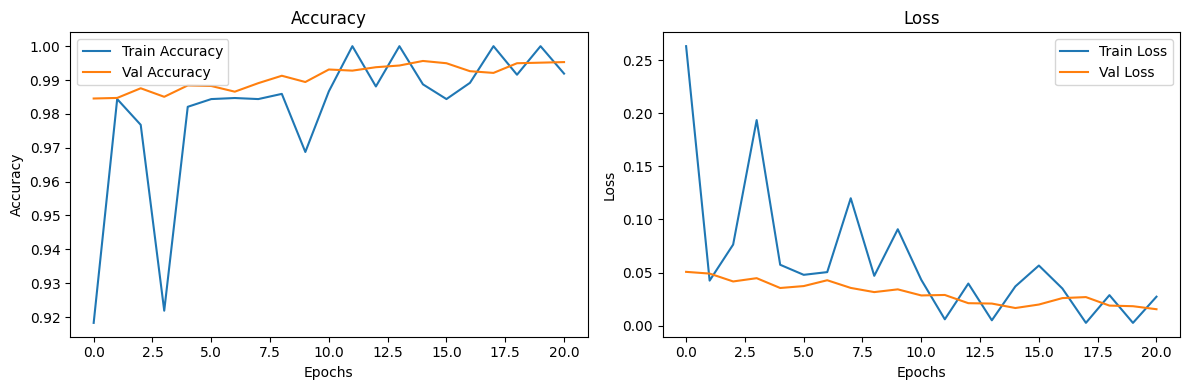

In [14]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
